In [2]:
import os
import zipfile

In [3]:
local_zip = 'archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
os.listdir("E:\Work\JUPITERC\Hands\data/images")

['frame_0.jpg',
 'frame_1.jpg',
 'frame_10.jpg',
 'frame_11.jpg',
 'frame_12.jpg',
 'frame_13.jpg',
 'frame_14.jpg',
 'frame_15.jpg',
 'frame_16.jpg',
 'frame_17.jpg',
 'frame_18.jpg',
 'frame_19.jpg',
 'frame_2.jpg',
 'frame_20.jpg',
 'frame_21.jpg',
 'frame_22.jpg',
 'frame_23.jpg',
 'frame_24.jpg',
 'frame_25.jpg',
 'frame_26.jpg',
 'frame_27.jpg',
 'frame_28.jpg',
 'frame_29.jpg',
 'frame_3.jpg',
 'frame_30.jpg',
 'frame_31.jpg',
 'frame_32.jpg',
 'frame_33.jpg',
 'frame_34.jpg',
 'frame_35.jpg',
 'frame_36.jpg',
 'frame_37.jpg',
 'frame_38.jpg',
 'frame_39.jpg',
 'frame_4.jpg',
 'frame_40.jpg',
 'frame_41.jpg',
 'frame_42.jpg',
 'frame_43.jpg',
 'frame_44.jpg',
 'frame_45.jpg',
 'frame_46.jpg',
 'frame_47.jpg',
 'frame_48.jpg',
 'frame_49.jpg',
 'frame_5.jpg',
 'frame_50.jpg',
 'frame_51.jpg',
 'frame_52.jpg',
 'frame_53.jpg',
 'frame_54.jpg',
 'frame_55.jpg',
 'frame_56.jpg',
 'frame_57.jpg',
 'frame_58.jpg',
 'frame_59.jpg',
 'frame_6.jpg',
 'frame_60.jpg',
 'frame_61.jpg',
 'fr

In [7]:
from PIL import Image
import os

def rotateImages(rotationAmt, folder_path):
    # List all files in the specified folder
    image_files = os.listdir(folder_path)

    # For each image file in the folder
    for image_file in image_files:
        # Join the folder path with the filename to get the full path
        image_path = os.path.join(folder_path, image_file)

        # Open the image
        img = Image.open(image_path)

        # Rotate and save the image with the same filename
        img_rotated = img.rotate(rotationAmt)
        img_rotated.save(image_path)

        # Close the image
        img.close()

# Specify the folder path containing the images
folder_path = "E:/Work/JUPITERC/Hands/Hands/Hands"

# Call the function with the rotation amount
rotateImages(180, folder_path)


In [20]:
import os

def rename_files_with_prefix(folder_path):
    # List all files in the specified folder
    file_list = os.listdir(folder_path)

    # For each file in the folder
    for file_name in file_list:
        # Join the folder path with the filename to get the full path
        file_path = os.path.join(folder_path, file_name)

        # Create the new filename by adding "h" as a prefix
        new_file_name = "h" + file_name

        # Join the folder path with the new filename to get the full path of the new file
        new_file_path = os.path.join(folder_path, new_file_name)

        # Rename the file by moving it to the new name
        os.rename(file_path, new_file_path)

# Specify the folder path containing the files
folder_path = "E:/Work/JUPITERC/Hands/Hands/Hands"

# Call the function to rename files with the prefix "h"
rename_files_with_prefix(folder_path)


In [4]:
#image_default = 1280x720
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import uuid
import cv2

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

images.as_numpy_iterator().next()

b'data\\frame\\frame_75.jpg'

In [6]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:
images = images.map(load_image)

In [8]:
images.as_numpy_iterator().next()

array([[[191, 193, 188],
        [191, 193, 188],
        [191, 193, 188],
        ...,
        [128, 124, 115],
        [126, 122, 113],
        [126, 122, 113]],

       [[191, 193, 188],
        [191, 193, 188],
        [191, 193, 188],
        ...,
        [127, 123, 114],
        [125, 121, 112],
        [125, 121, 112]],

       [[191, 193, 188],
        [191, 193, 188],
        [191, 193, 188],
        ...,
        [127, 123, 114],
        [125, 121, 112],
        [125, 121, 112]],

       ...,

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 75,  39,  13],
        [ 75,  39,  13],
        [ 75,  39,  13]],

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 75,  39,  13],
        [ 75,  39,  13],
        [ 75,  39,  13]],

       [[ 39,  34,  31],
        [ 39,  34,  31],
        [ 39,  34,  31],
        ...,
        [ 74,  38,  12],
        [ 74,  38,  12],
        [ 74,  38,  12]]

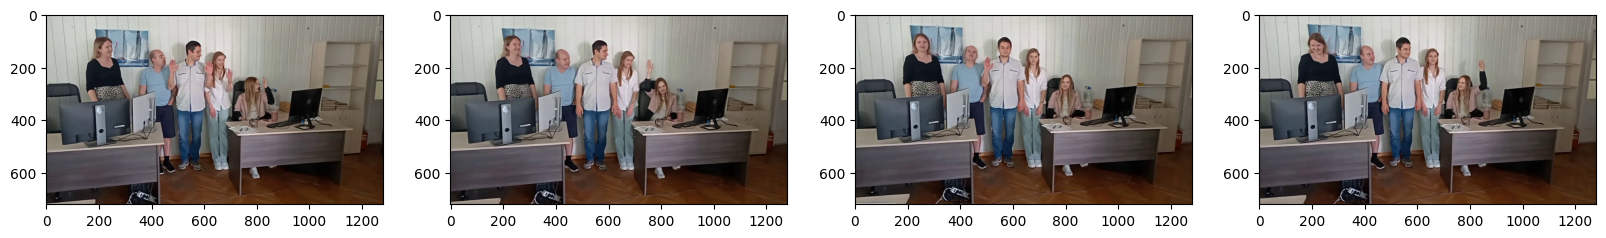

In [11]:
image_generator = images.batch(4).as_numpy_iterator()

plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [26]:
def get_image_paths(folder_path, extensions=[".jpg"]):
    image_paths = []
    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in extensions):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

# Replace 'your_folder_path' with the actual path of the folder containing the images
folder_path = "E:\Work\JUPITERC\Hands\Hands\Hands"
image_paths = get_image_paths(folder_path)

labels = ["palm"]


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Step 1: Load image paths and corresponding labels
# Assuming you have two lists: 'image_paths' containing file paths of images, and 'labels' containing corresponding labels

# Step 2: Split data into training and test/validation sets (70/30 split)
train_images, test_images, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.3, random_state=42)

# Step 3: Split the test/validation set into validation and test sets (50/50 split)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Step 4: Create three folders for the splits
os.makedirs("train", exist_ok=True)
os.makedirs("validation", exist_ok=True)
os.makedirs("test", exist_ok=True)

# Move the images to their corresponding folders
def move_images(images, labels, destination_folder):
    for image_path, label in zip(images, labels):
        destination_path = os.path.join(destination_folder, label)
        os.makedirs(destination_path, exist_ok=True)
        shutil.copy(image_path, destination_path)

move_images(train_images, train_labels, "train")
move_images(val_images, val_labels, "validation")
move_images(test_images, test_labels, "test")


In [10]:
import albumentations as alb

In [18]:
img = cv2.imread('E:\Work\JUPITERC\Hands/test\hHand_0000005.jpg\hHand_0000005.jpg')

In [19]:
print(img.shape)
print(type(img.shape))

(1200, 1600, 3)
<class 'tuple'>


In [20]:
augmentor = alb.Compose([alb.RandomCrop(width=400, height=300), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))